# Session – 2: Convergence Concepts and Central Limit Theorem

## Tutorial-2

### A)

Suppose that 𝑋1, ⋯ , 𝑋𝑛 be a random sample of size 𝑛 from the Exponential(𝜆) distribution with
rate parameter 𝜆. Consider $𝑌_𝑛 = \overline{X_n} $  be a new sequence of random variables which is basically the
sample mean. Using the Moment Generating Function obtain the sampling distribution of 𝑌𝑛 and
identify the family of density functions in which it belongs. Show that 𝑌𝑛 converges to 1
𝜆 in
probability using computer simulations. Do the following exercises:

a) Plot the population density function for different choices of 𝜆 in a single plot window and
add appropriate legends.  

exponential funciton is given as:

$𝑓(𝑥) = \lambda𝑒^{−\lambda𝑥}$, 𝑥 > 0 and zero otherwise.



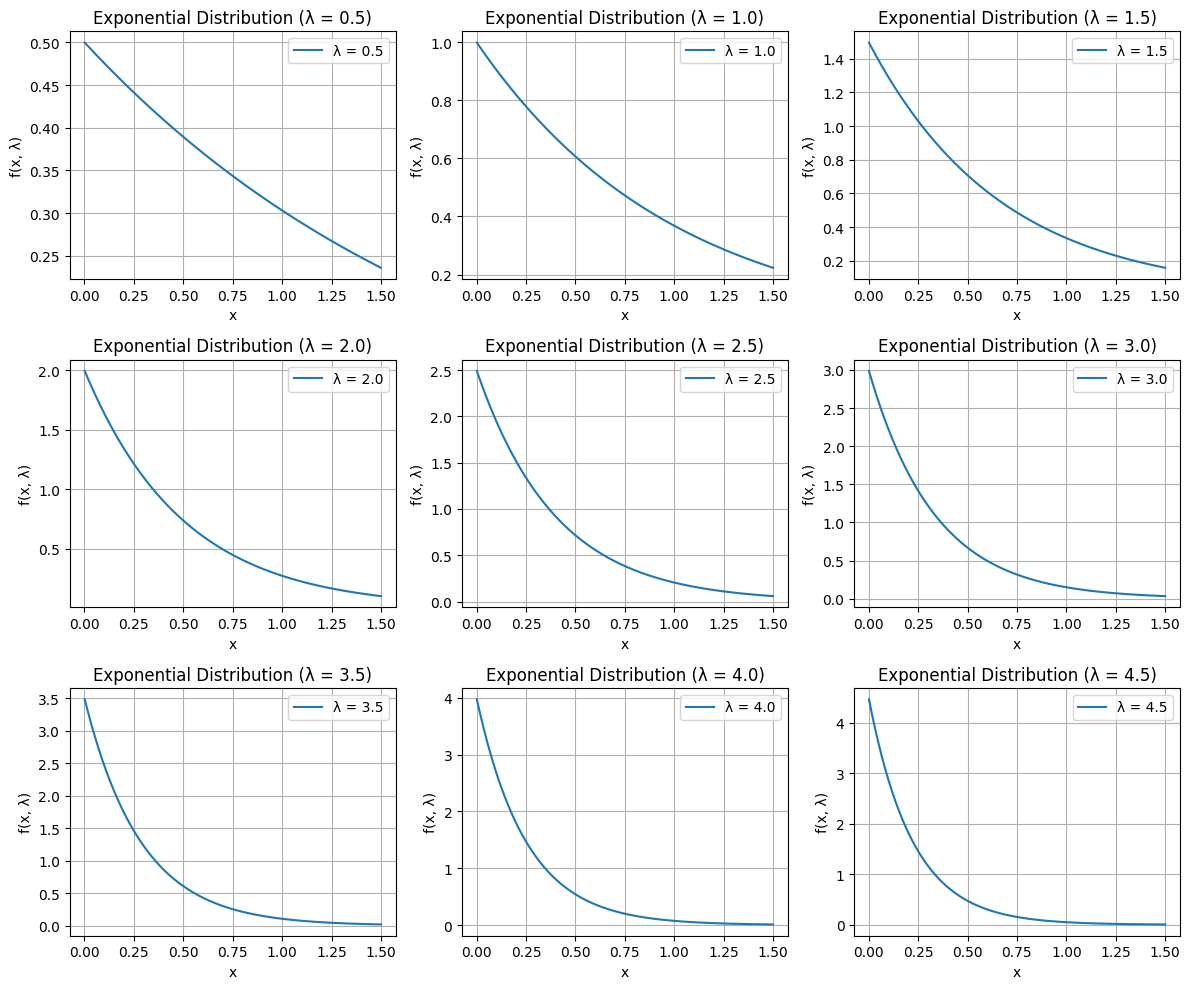

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of lambda values
λ_vals = np.arange(0.5, 5, 0.5)

# Define x values for the function
x_values = np.linspace(0, 1.5, 1000)

# Define the probability density function f(x, λ) using NumPy vectorization
def f(x, λ):
    return np.where(x > 0, λ * np.exp(-λ * x), np.nan)

# Plotting the functions for different lambda values
plt.figure(figsize=(12, 10))  # Adjust figure size if needed

for i, λ in enumerate(λ_vals):
    plt.subplot(3, 3, i + 1)
    plt.plot(x_values, f(x_values, λ), label=f'λ = {λ}')
    plt.xlabel('x')  # X-axis label
    plt.ylabel('f(x, λ)')  # Y-axis label
    plt.title(f'Exponential Distribution (λ = {λ})')  # Title for each subplot
    plt.grid(True)  # Add grid
    plt.legend()  # Show legend

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()


b) Plot the PDF of $Y_𝑛$ , call it $𝑓_{𝑌_𝑛}(𝑦)$. Note that it has a positive support. Starting from the
simulation of Uniform(0,1) random variables, simulate 𝑀 = 1000 observations from the
sampling distribution of $𝑌_𝑛$ .   

pdf calcualted using the MGF got the expression $\left(\frac{n\lambda}{n\lambda - t}\right)^n$ which tell that $Y_n$ follows gamma with $\alpha$ = n and $\beta = 1/n\lambda$




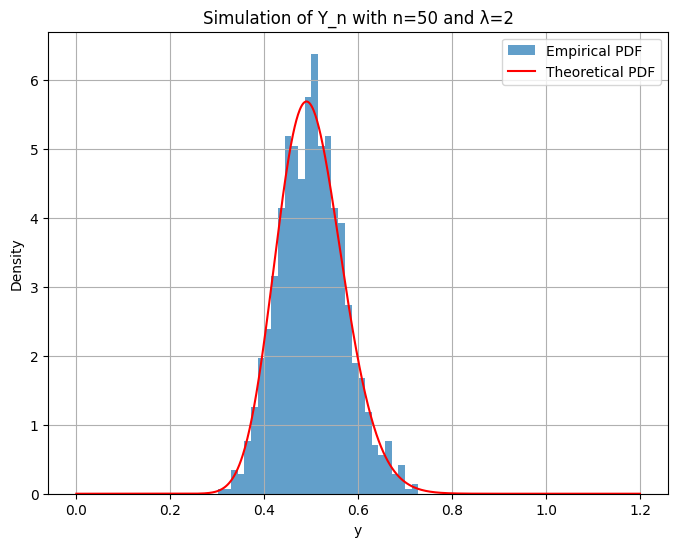

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from math import gamma

# Define the probability density function f(y) with given parameters n and λ
def f(y, n=5, λ=2):
    # Calculate the PDF value for y
    pdf_value = ((n * λ)**n * np.exp(-n * λ * y) * y**(n - 1)) / gamma(n)
    # Ensure that the PDF is zero for y <= 0
    return np.where(y > 0, pdf_value, 0)

# Generate simulated observations Y_n using the given parameters
def simulate_Yn(M, n, λ):
    # Generate M observations of Y_n using the inverse transform method
    Y_n = [np.mean(- (1 / λ) * np.log(np.random.uniform(0, 1, n))) for _ in range(M)]
    return Y_n

# Parameters
M = 1000  # Number of observations to simulate
n = 50  # Number of Uniform(0,1) samples to average for each Y_n calculation
λ = 2     # Rate parameter for the exponential distribution

# Simulate observations Y_n
Y_n = simulate_Yn(M, n, λ)

# Generate y values for plotting the PDF
y_values = np.linspace(0, 1.2, 1000)

# Plotting the histogram of simulated Y_n and the calculated PDF f(y)
plt.figure(figsize=(8, 6))
plt.hist(Y_n, bins=30, density=True, alpha=0.7, label='Empirical PDF')  # Histogram plot
plt.plot(y_values, f(y_values, n, λ), 'r-', label='Theoretical PDF')  # Theoretical PDF plot
plt.title(f'Simulation of Y_n with n={n} and λ={λ}')
plt.xlabel('y')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

plt.show()


(c) Fix 𝜖 = 0.01 and 𝜆 = 0.5 and 𝑛 = 6. Using the numerical integration in Python, compute the probability the probability $P(|Y_n - \frac{1}{\lambda}(mean)| \leq \epsilon)$.





         

Solution:   
 $P(|Y_n - \frac{1}{\lambda}| > \epsilon)$ tends to zero as  $P(|Y_n - \frac{1}{\lambda}| < \epsilon)$ tends to one, as we have to check the convergence of the $Y_n$

 $P(|Y_n - \frac{1}{\lambda}| > \epsilon)$ = 1 -  $P(|Y_n - \frac{1}{\lambda}| < \epsilon)$ = 1 -  $P(\frac{1}{\lambda} - \epsilon < Y_n < \frac{1}{\lambda} + \epsilon)$


In [17]:
import scipy.integrate as integrate

λ = 0.5
ϵ = 0.01
n = 6


result =  integrate.quad(f,(1/λ - ϵ),(1/λ + ϵ), args= (n,λ))[0]
print(result)

0.009637227838533083


d) Consider 𝑛 = 1,2,3, … and compute the probability $P(|Y_n - \frac{1}{\lambda}| < \epsilon)$ and call it $𝑏_𝑛$. Plot
$𝑏_𝑛$ values against 𝑛 and check whether it is converging to 1.



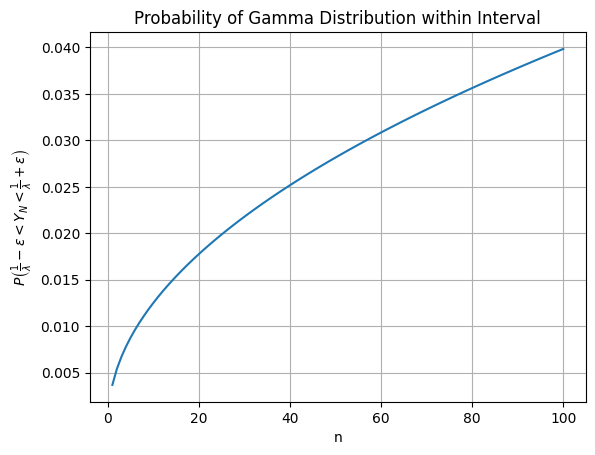

In [19]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Define the parameters
λ = 0.5  # Lambda, rate parameter for the distribution
ϵ = 0.01  # Epsilon, small interval width around 1/λ
result_list = []  # List to store the results of integration
n_vals = [i for i in range(1, 101)]  # List of n values from 1 to 100 
# for large values of n it is showing error check if can find another function that support larger n values



# Perform integration for each n in n_vals
for n in n_vals:
    result = integrate.quad(f, (1/λ - ϵ), (1/λ + ϵ), args=(n, λ))[0]
    result_list.append(result)  # Append the integration result to the list

# Plot the results
plt.plot(n_vals, result_list)
plt.xlabel("n")  # Label for the x-axis
plt.ylabel(r"$P\left(\frac{1}{\lambda} - \epsilon < Y_N < \frac{1}{\lambda} + \epsilon\right)$")  # Label for the y-axis with LaTeX formatting
plt.title("Probability of Gamma Distribution within Interval")  # Title of the plot
plt.grid(True)  # Enable grid for better visualization
plt.show()  # Display the plot


e) Using computer simulations, can you approximate the above probability instead of
computing the integral numerically? (The presence of the ratio of $𝑛^𝑛$ and Γ(𝑛) may give
numerical instability). Simulate 𝑀 observations of $𝑌_n$ and check for 𝑚 ∈ {1,2, ⋯ , 𝑀}, the
condition $|Y_n - \frac{1}{\lambda}| < \epsilon$ is true or false. Proportion of TRUE will give an approximation of
the probability.

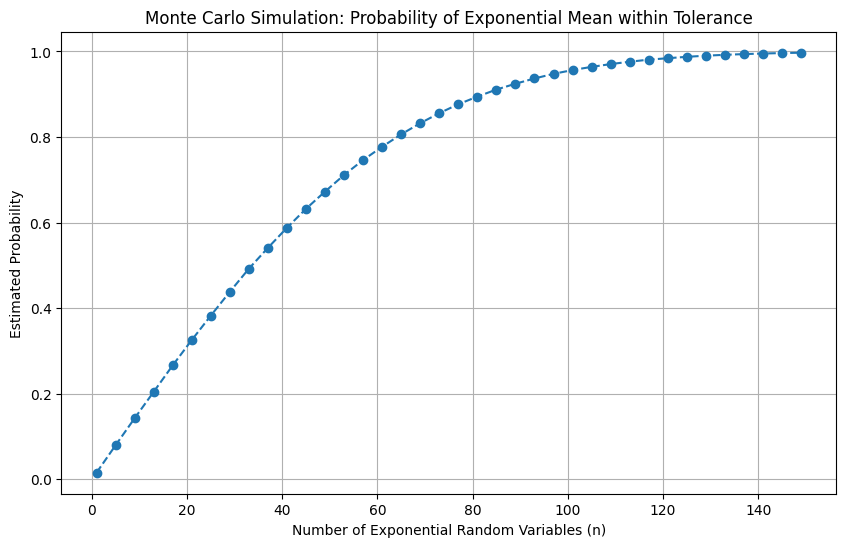

In [21]:
import numpy as np
import matplotlib.pyplot as plt

M = 10**6  # Number of Monte Carlo samples
#n_vals = list(range(1, 100, 20))
n_vals = [i for i in range(1,150,4)]  # Number of exponential random variables to average
λ = 2  # Rate parameter of the exponential distribution
ϵ = 0.01  # Tolerance around the true mean 1/λ

bn = []   #prob_vals

for n in n_vals:
    y =[]
    # Perform Monte Carlo simulation
    for i in range(1, M):
        x = np.random.gamma(n,1/(n*λ),n)
        y_mean = np.mean(x)  # Sample mean of n exponential random variables
        y.append(y_mean)
    bn.append(np.sum(np.abs(np.array(y) - (1 / λ)) < ϵ) / M)


plt.figure(figsize=(10, 6))
plt.plot(n_vals, bn, marker='o', linestyle='--')
plt.xlabel('Number of Exponential Random Variables (n)')
plt.ylabel('Estimated Probability')
plt.title('Monte Carlo Simulation: Probability of Exponential Mean within Tolerance')
plt.grid(True)
plt.show()


### B)

Suppose that 𝑋1, ⋯ , 𝑋𝑛 be a random sample of size 𝑛 from the Uniform(0,1) distribution and
consider the sample mean $\overline{X_n}$.

a) Using computer simulation, show that $\overline{X_n}$ converges to 1/2. Note: In the previous problem
A, you were able to find the exact sampling distribution of sample mean, however, it may
not be feasible here as this is quiet involved in nature. So, here by simulation, we can
establish the convergence

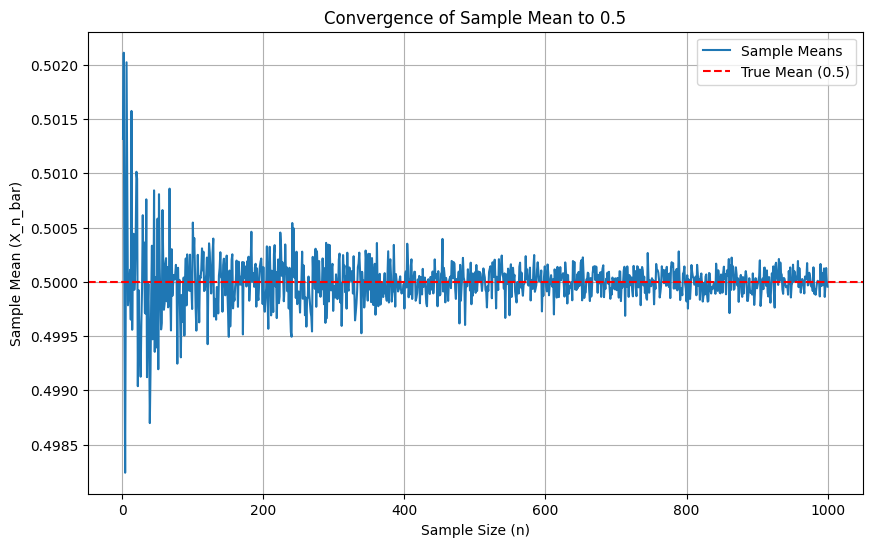

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_iterations = 10**4  # Number of iterations for each sample size
max_sample_size = 1000  # Maximum sample size to test

sample_means = []  # List to store sample means for different sample sizes

# Iterate over different sample sizes
for n in range(1, max_sample_size + 1):
    means = []
    # Generate sample means for the current sample size
    for _ in range(num_iterations):
        samples = np.random.uniform(0, 1, size=n)  # Generate random samples
        sample_mean = np.mean(samples)  # Compute sample mean
        means.append(sample_mean)
    
    # Calculate the mean of sample means for current sample size
    sample_means.append(np.mean(means))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_sample_size + 1), sample_means, label='Sample Means')
plt.axhline(y=0.5, color='r', linestyle='--', label='True Mean (0.5)')
plt.title('Convergence of Sample Mean to 0.5')
plt.xlabel('Sample Size (n)')
plt.ylabel('Sample Mean (X_n_bar)')
plt.legend()
plt.grid(True)
plt.show()


### C)

Fix 𝑛 = 4 and simulate 𝑋1,⋯ , 𝑋𝑛 from Uniform(0,1) distribution and compute $\overline{X_n}$. Repeat this
process 𝑀 = 1000 times to obtain 𝑀 realizations from the sampling distribution of $\overline{X_n}$. Draw
histogram of these values. Repeat the process for 𝑛 = 10, 20, 30, 50 and overlay 𝒩(𝜇, $𝜎^2$)
distribution. What are appropriate values of 𝜇 and $𝜎^2$.

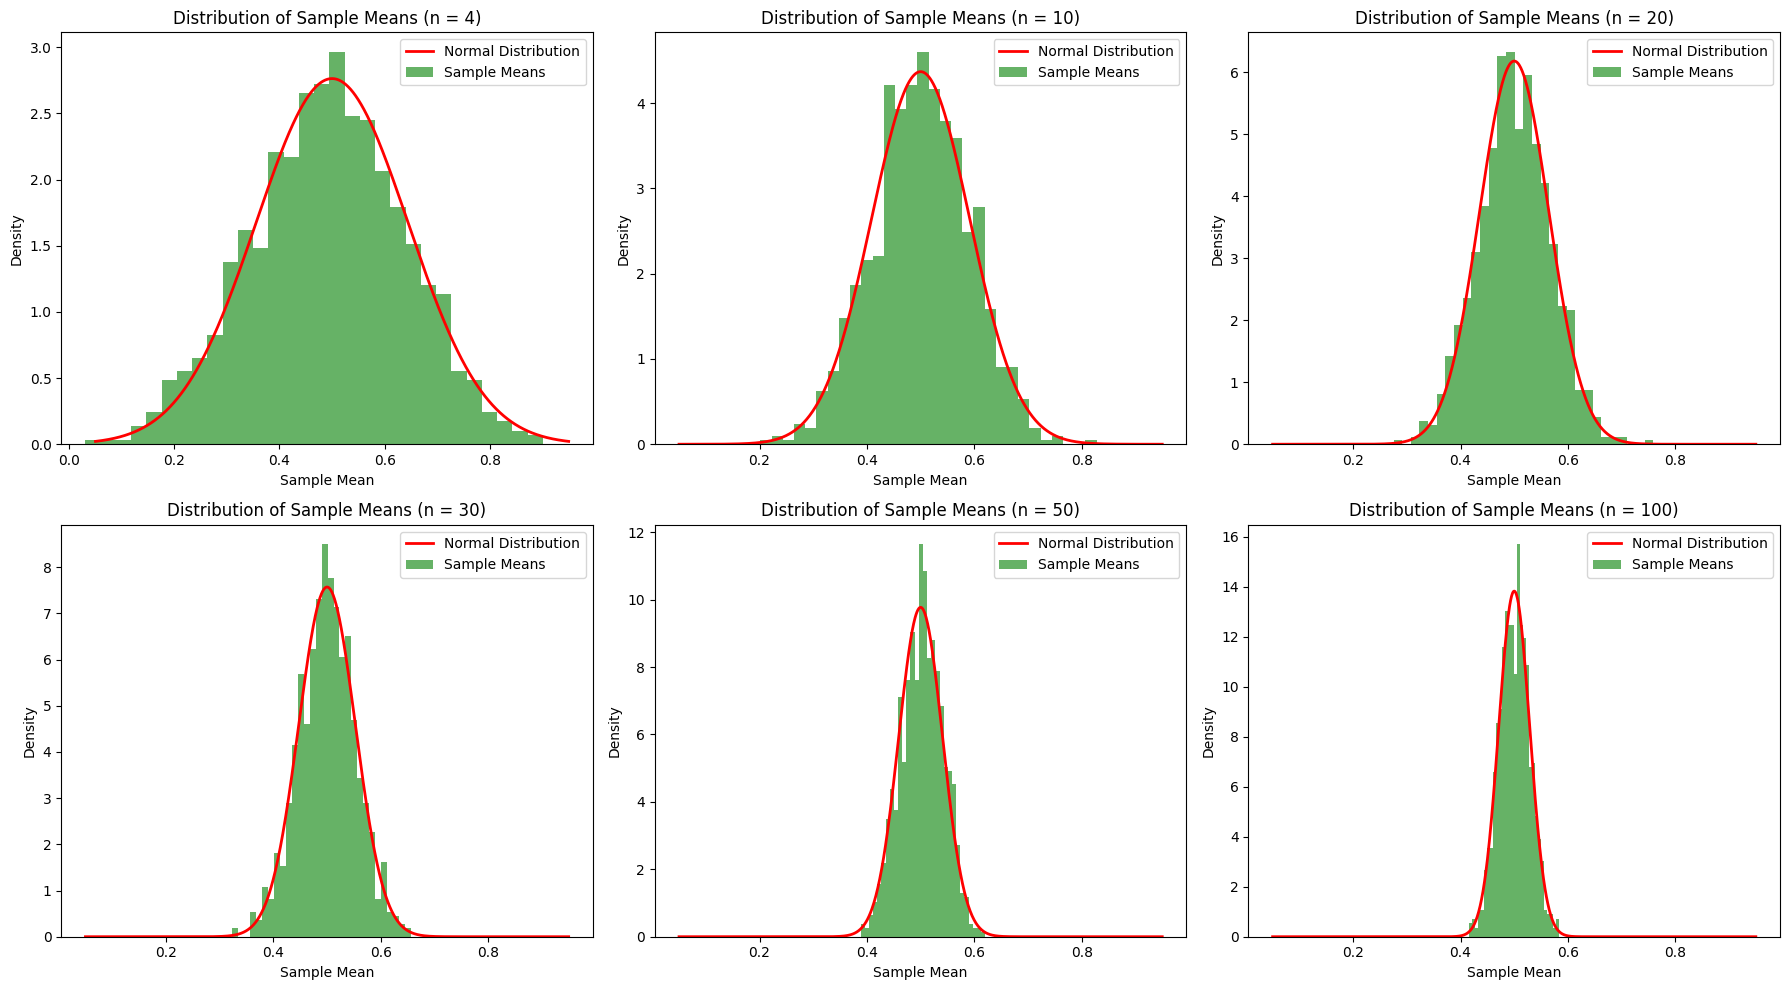

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# List of different sample sizes
n_vals = [4, 10, 20, 30, 50, 100]
M = 1000  # Number of samples to generate for each n

# Set up the figure for multiple subplots
plt.figure(figsize=(18, 10))

# Loop over different sample sizes
for i, n in enumerate(n_vals):
    x_bar_vals = []  # List to store sample means for current n
    for _ in range(M):
        x = np.random.uniform(0, 1, n)  # Generate n uniform random samples
        x_bar = np.mean(x)  # Calculate the sample mean
        x_bar_vals.append(x_bar)  # Append the sample mean to the list
    
    # Create a subplot for the current sample size
    plt.subplot(2, 3, i + 1)
    plt.hist(x_bar_vals, density=True, bins=30, alpha=0.6, color='g')  # Plot histogram of sample means
    plt.title(f'Distribution of Sample Means (n = {n})')  # Title with current sample size
    plt.xlabel('Sample Mean')  # Label for x-axis
    plt.ylabel('Density')  # Label for y-axis

    # Parameters for the normal distribution
    μ = 0.5  # Population mean for uniform distribution U(0,1)
    σ2 = 1/12  # Population variance for uniform distribution U(0,1)

    # Plot the theoretical normal distribution
    x_values = np.linspace(0.05, 0.95, 1000)
    plt.plot(x_values, st.norm.pdf(x_values, μ, np.sqrt(σ2 / n)), 'r-', lw=2)
    plt.legend(['Normal Distribution', 'Sample Means'], loc='upper right')  # Add a legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


### D)

Consider solving the definite integral $\int_0^1 f(x)$, where 𝑓(𝑥) = |sin 𝑚𝑥 + cos 𝑛𝑥|, 0 < 𝑥 < 1
and 𝑚, 𝑛 are positive integers.

a) Plot the function for different choices of 𝑚 and 𝑛 and appropriate legends. Give particular
emphasis when these values are large. Compute the integral using inbuilt integrator in
R/Python.

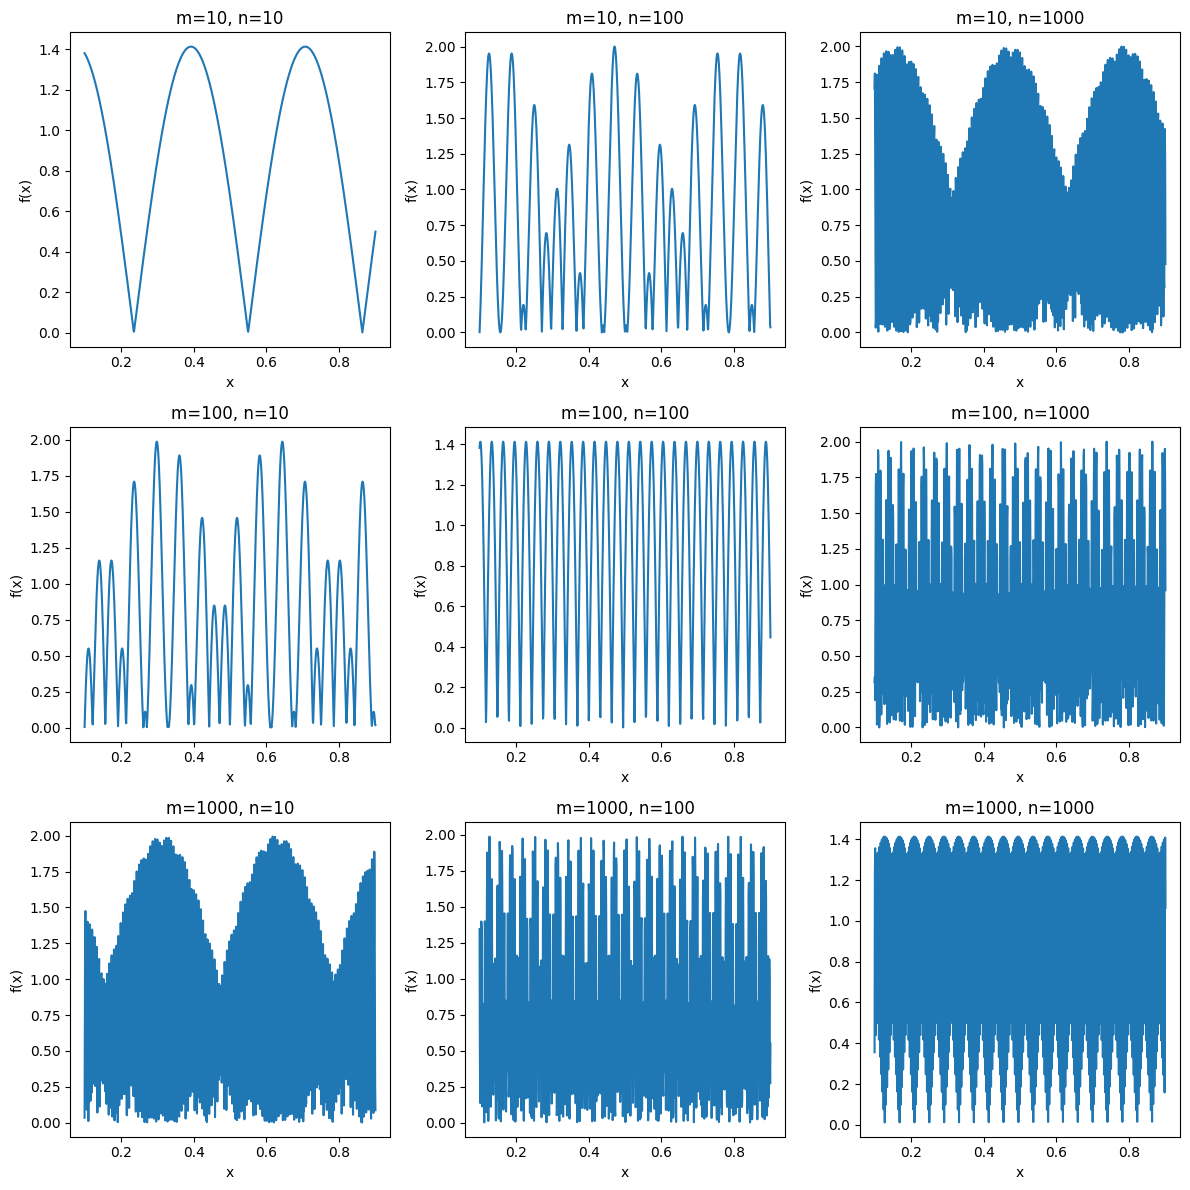

Integral of f(x) for m=10, n=10: 0.6860863955433902, Error: 8.437571766794447e-09
Integral of f(x) for m=10, n=100: 0.6722876930235026, Error: 0.0025927080112513323
Integral of f(x) for m=10, n=1000: 0.6665360261090638, Error: 0.2756665318960686
Integral of f(x) for m=100, n=10: 0.6243562127105844, Error: 0.01974416382720491
Integral of f(x) for m=100, n=100: 0.7236171137142624, Error: 0.0019007640376570434
Integral of f(x) for m=100, n=1000: 0.6495690760686673, Error: 0.0835748783487994
Integral of f(x) for m=1000, n=10: 0.6211061403856786, Error: 0.06355959002454292
Integral of f(x) for m=1000, n=100: 0.6459247394193081, Error: 0.06189041358317682
Integral of f(x) for m=1000, n=1000: 0.721046178094293, Error: 0.007135078376032333


C:\Users\annun\AppData\Local\Temp\ipykernel_4912\3575023221.py:50: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, error = quad(f, 0.1, 0.9, args=(m, n))


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the function f
def f(x, m, n):
    # Apply the function only for 0 < x < 1, otherwise return NaN
    return np.where((x > 0) & (x < 1), np.abs(np.sin(m * x) + np.cos(n * x)), np.nan)

# Generate x values from 0.1 to 0.9 for plotting
x_values = np.linspace(0.1, 0.9, 1000)

# Define m and n values to use
m_values = [10, 100, 1000]
n_values = [10, 100, 1000]

# Set up the figure for multiple subplots
plt.figure(figsize=(12, 12))

# Initialize subplot index
subplot_idx = 1

# Loop over all combinations of m and n values
for m in m_values:
    for n in n_values:
        # Create a subplot for each combination of m and n
        plt.subplot(len(m_values), len(n_values), subplot_idx)
        
        # Plot the function f(x) for the given m and n
        plt.plot(x_values, f(x_values, m, n))
        
        # Add title and labels
        plt.title(f'm={m}, n={n}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        
        # Move to the next subplot
        subplot_idx += 1

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Integrate the function f over the interval 0.1 to 0.9 for each combination of m and n
for m in m_values:
    for n in n_values:
        # Use scipy.integrate.quad to calculate the integral
        integral_value, error = quad(f, 0.1, 0.9, args=(m, n))
        
        # Print the result of the integration
        print(f'Integral of f(x) for m={m}, n={n}: {integral_value}, Error: {error}')


b) State appropriate theorem which ensures the function in (Riemann) integrable. Using
random numbers from the Uniform(0,1) random numbers, obtain the Monte Carlo
estimate of the integral based on 10000 observations. Also provide an estimate of the
variance of the approximation.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the function f
def f(x, m, n):
    return np.abs(np.sin(m * x) + np.cos(n * x))

# Parameters
m = 10
n = 10
a = 0.1
b = 0.9
N = 10000  # Number of Monte Carlo samples

# Generate random samples from Uniform(a, b)
random_samples = np.random.uniform(a, b, N)

# Compute the function values at these points
f_values = f(random_samples, m, n)

# Monte Carlo estimate of the integral
integral_estimate = (b - a) * np.mean(f_values)

# Estimate of the variance
variance_estimate = ((b - a) ** 2) * np.var(f_values) / N

print(f'Monte Carlo estimate of the integral: {integral_estimate}')
print(f'Estimate of the variance of the approximation: {variance_estimate}')

# Calculate exact integral for comparison
exact_integral, _ = quad(f, a, b, args=(m, n))
print(f'Exact integral (for comparison): {exact_integral}')


Monte Carlo estimate of the integral: 0.6847464008316977
Estimate of the variance of the approximation: 1.2743710892903651e-05
Exact integral (for comparison): 0.6860863955433902


### E)

Suppose that 𝑋1, ⋯ , 𝑋𝑛 are independent and identically distribution random variables following
Binomial(1, 𝑝) random variables. Use CLT to justify that $\overline{X_n}$ has approximately normally
distributed with mean 𝑝 and variance 𝑝(1−𝑝)/𝑛 . Fix 𝑛 and 𝑝. Obtain 𝑀 = 1000 realizations from the
sampling distribution of $\overline{X_n}$ and draw the histogram. Overlay the normal density function on the
histogram and check whether the theoretical claim matches.

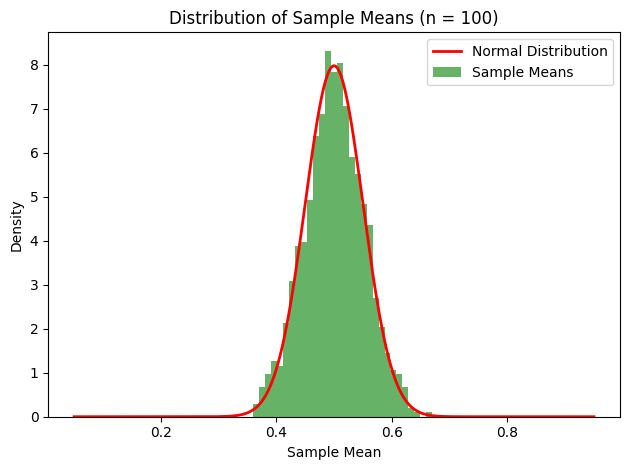

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Parameters
n = 100  # Sample size
M = 1000  # Number of realizations
p = 0.5  # Probability of success in Binomial(1, p)

# List to store the sample means
x_bar_vals = []

# Generate M realizations of the sample mean
for _ in range(M):
    # Generate n i.i.d. Binomial(1, p) random variables
    x = np.random.binomial(1, p, n)
    # Compute the sample mean
    x_bar = np.mean(x)
    # Append the sample mean to the list
    x_bar_vals.append(x_bar)

# Plot the histogram of the sample means
plt.hist(x_bar_vals, density=True, bins=30, alpha=0.6, color='g')
plt.title(f'Distribution of Sample Means (n = {n})')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

# Theoretical mean and variance of the sample mean
mean = p  # Population mean
variance = (p * (1 - p)) / n  # Variance of the sample mean

# Overlay the normal density function
x_values = np.linspace(0.05,0.95, 1000)
plt.plot(x_values, st.norm.pdf(x_values, mean, np.sqrt(variance)), 'r-', lw=2)
plt.legend(['Normal Distribution', 'Sample Means'], loc='upper right')

plt.tight_layout()
plt.show()


## Handout-2

This handout contains the approximation of the probability of the form $ P(|𝑋_𝑛 − 𝑋| > 𝜖)$ for 𝜖 > 0
using both numerical integration and computer simulation for different sample sizes 𝑛. If this
probability converges to zero as 𝑛 increases, we say that $𝑋_𝑛$ converges to 𝑋 in probability. The example
here contains the convergence of $ \overline{X_n}$ to 1/2 where $𝑋_1,\dots, 𝑋_𝑛$ are independent and identically distributed
Exponential(𝜆 = 2) distribution.

(a) Plot of the density function $𝑓(𝑥) = 2𝑒^{−2𝑥}$, 𝑥 > 0 and zero otherwise.`

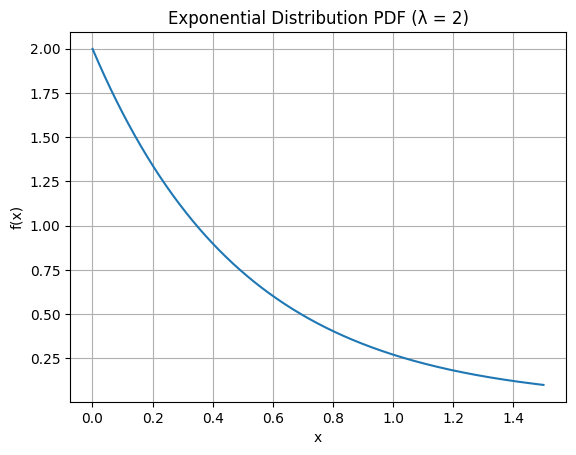

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Rate parameter
λ = 2

# Define the exponential PDF function
def f(x):
    if x > 0:
        return λ * np.exp(-λ * x)
    else:
        return np.nan # you can write zero

# Generate x values
x_values = np.linspace(-0.5, 1.5, 1000)

# Calculate the PDF values using a list comprehension
pdf_values = [f(x) for x in x_values]

# Plot the PDF
plt.plot(x_values, pdf_values)
plt.title('Exponential Distribution PDF (λ = 2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()


(b) Exact sampling distribution $Y_n = \overline{X_n} $ which is Gamma(𝑛, 1/𝑛𝜆)   

   
Calcualted using the MGF got the expression $\left(\frac{n\lambda}{n\lambda - t}\right)^n$ which tell that $Y_n$ follows gamma with $\alpha$ = n and $\beta = 1/n\lambda$


Correction In amiya sir handout:
    sir has written Gamma(n,𝑛𝜆) it should be Gamma(𝑛, 1/𝑛𝜆)

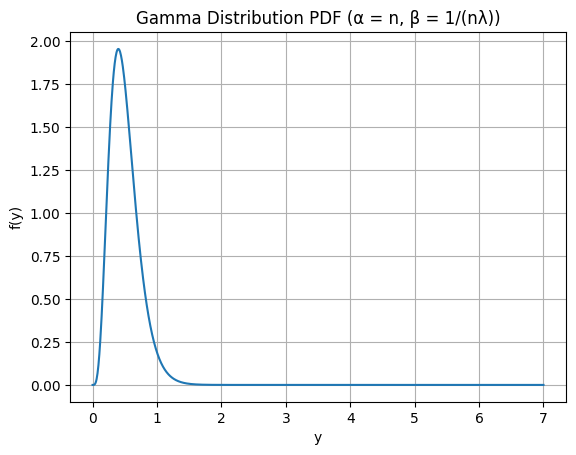

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from math import gamma

# Define the PDF function for the Gamma distribution
def f(y, n=5, λ=2):
    condition = (y > 0)
    result = np.where(condition, ((n * λ)**n * np.exp(-n * λ * y) * y**(n - 1)) / gamma(n), 0)
    return result

# Generate y values
y_values = np.linspace(0, 7, 1000)

# Calculate the PDF values
pdf_values = f(y_values)

# Plot the PDF
plt.plot(y_values, pdf_values)
plt.title('Gamma Distribution PDF (α = n, β = 1/(nλ))')
plt.xlabel('y')
plt.ylabel('f(y)')
plt.grid(True)
plt.show()


(c) Visualize the sampling distribution of $𝑌_𝑛$ for different choices of 𝑛

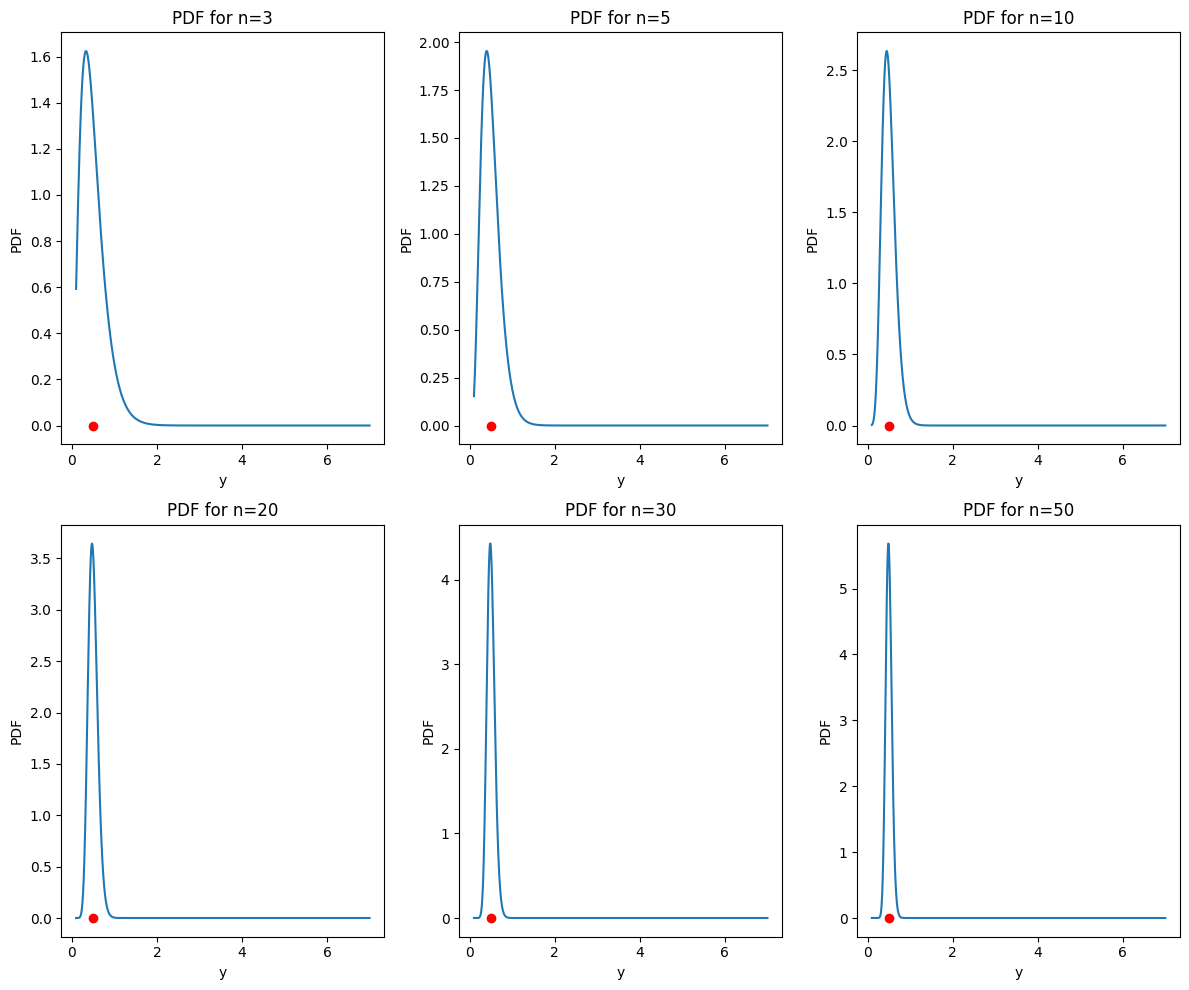

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from math import gamma

# Define the PDF function for the Gamma distribution
def f(y, n=5, λ=2):
    # Check if y > 0
    condition = (y > 0)
    # Compute the Gamma PDF using the given formula
    result = np.where(condition, ((n * λ)**n * np.exp(-n * λ * y) * y**(n - 1)) / gamma(n), 0)
    return result

# List of different values of n to plot
n_vals = [3, 5, 10, 20, 30, 50]
# Generate y values ranging from 0.1 to 7
y_values = np.linspace(0.1, 7, 1000)

# Create a figure with a specified size
plt.figure(figsize=(12, 10))

# Loop over each value of n in n_vals
for i, n in enumerate(n_vals):
    # Create a subplot for each n
    plt.subplot(2, 3, i + 1)
    # Calculate the PDF values for the current n
    pdf_values = f(y_values, n)
    # Plot the PDF
    plt.plot(y_values, pdf_values)
    # Mark the point y = 1/λ with a red dot
    plt.scatter([1 / λ], [0], color='red')
    # Set the title for the subplot
    plt.title(f'PDF for n={n}')
    # Label the x-axis
    plt.xlabel('y')
    # Label the y-axis
    plt.ylabel('PDF')

# Adjust the layout to prevent overlapping
plt.tight_layout()
# Display the plots
plt.show()


(d) Fix 𝜖 = 0.01 and compute the probability $P(|Y_n - \frac{1}{\lambda}(mean)| < \epsilon)$. First visualize the area which we aim
to compute the probability as a function of 𝑛.

 $P(|Y_n - \frac{1}{\lambda}| > \epsilon)$ tends to zero as  $P(|Y_n - \frac{1}{\lambda}| < \epsilon)$ tends to one, as we have to check the convergence of the $Y_n$

 $P(|Y_n - \frac{1}{\lambda}| > \epsilon)$ = 1 -  $P(|Y_n - \frac{1}{\lambda}| < \epsilon)$ = 1 -  $P(\frac{1}{\lambda} - \epsilon < Y_n < \frac{1}{\lambda} + \epsilon)$



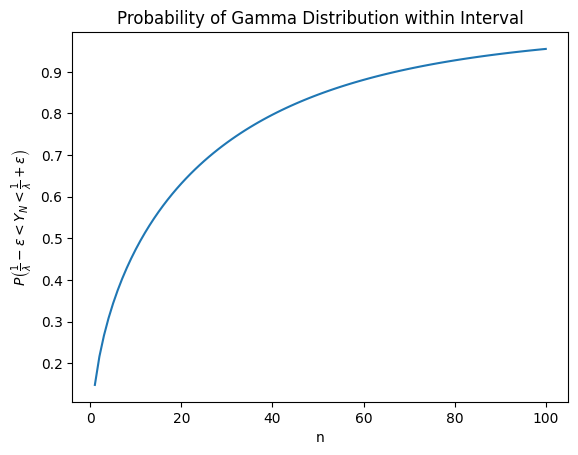

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import gamma

# Define the PDF function for the Gamma distribution
def f(y, n, λ=2):
    # Compute the Gamma PDF using the given formula
    condition = (y > 0)
    result = np.where(condition, ((n * λ)**n * np.exp(-n * λ * y) * y**(n - 1)) / gamma(n), 0)
    return result

# Set the parameters λ and ϵ
λ = 2
ϵ = 0.1

# Initialize an empty list to store the results
result_list = []

# Generate a list of n values from 1 to 100
n_vals = [i for i in range(1, 101)]

# Loop over each value of n
for n in n_vals:
    # Calculate the integral of the PDF function over the interval (1/λ - ϵ, 1/λ + ϵ)
    result, error =  integrate.quad(f, (1/λ - ϵ), (1/λ + ϵ), args=(n,))
    # Append the result to the result_list
    result_list.append(result)

# Plot the results
plt.plot(n_vals, result_list)
plt.xlabel("n")
plt.ylabel(r"$P\left(\frac{1}{\lambda} - \epsilon < Y_N < \frac{1}{\lambda} + \epsilon\right)$")
plt.title("Probability of Gamma Distribution within Interval")
# Uncomment the line below to show the grid
# plt.grid(True)
plt.show()


e) The numerical computation carried out in Step (d), can be performed by using computer
simulation as follows:

In [43]:
import numpy as np

M = 10000  # Number of Monte Carlo samples
n = 5  # Number of exponential random variables to average
λ = 2  # Rate parameter of the exponential distribution
ϵ = 0.1  # Tolerance around the true mean 1/λ

y = []

# Perform Monte Carlo simulation
for i in range(1, M):
    # Generate n exponential random variables using inverse transform method
    u = np.random.uniform(0, 1, n)
    x = -1* (1 / λ) * np.log(1 - u)  # Exponential random variables
    y_mean = np.mean(x)  # Sample mean of n exponential random variables
    y.append(y_mean)

# Estimate the probability that |y - (1/λ)| < ϵ
probability_estimate = np.sum(np.abs(np.array(y) - (1 / λ)) < ϵ) / M

print("Estimated probability:", probability_estimate)


Estimated probability: 0.3354


(f) Repeat step (e) for different increasing values of 𝑛 and see whether the probabilities are
converging to 1 or not.

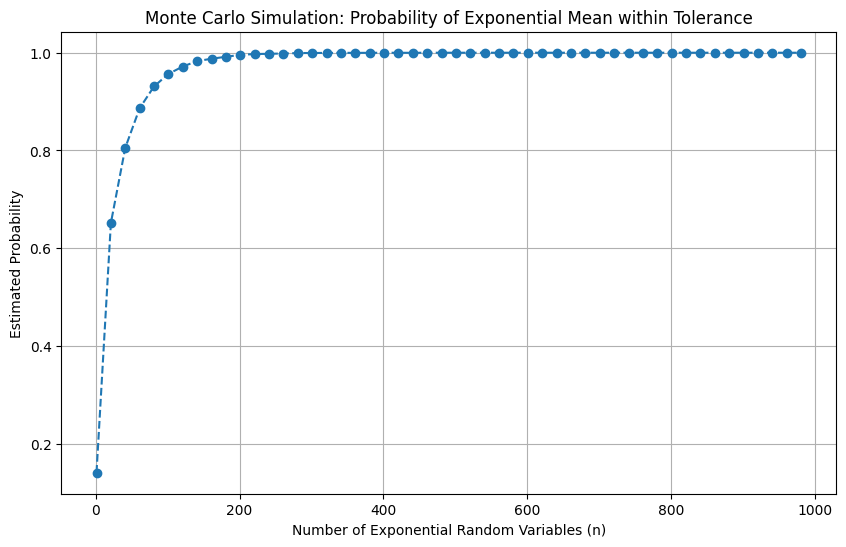

In [44]:
import numpy as np

M = 10000  # Number of Monte Carlo samples
#n_vals = list(range(1, 1000, 20))
n_vals = [i for i in range(1,1000,20)]  # Number of exponential random variables to average
λ = 2  # Rate parameter of the exponential distribution
ϵ = 0.1  # Tolerance around the true mean 1/λ

prob_vals = []

for n in n_vals:
    y =[]
    # Perform Monte Carlo simulation
    for i in range(1, M):
        # Generate n exponential random variables using inverse transform method
        u = np.random.uniform(0, 1, n)
        x = -1* (1 / λ) * np.log(1 - u)  # Exponential random variables
        y_mean = np.mean(x)  # Sample mean of n exponential random variables
        y.append(y_mean)
    prob_vals.append(np.sum(np.abs(np.array(y) - (1 / λ)) < ϵ) / M)


plt.figure(figsize=(10, 6))
plt.plot(n_vals, prob_vals, marker='o', linestyle='--')
plt.xlabel('Number of Exponential Random Variables (n)')
plt.ylabel('Estimated Probability')
plt.title('Monte Carlo Simulation: Probability of Exponential Mean within Tolerance')
plt.grid(True)
plt.show()


(g) In Step (f), we have used the probability integral transform to estimate the probability by
simulation. However, you could also directly simulate from the Gamma(𝑛, 𝑛𝜆) distribution using
the rgamma() function available in R. You can also use np.random.gamma() function
available in NumPy library.

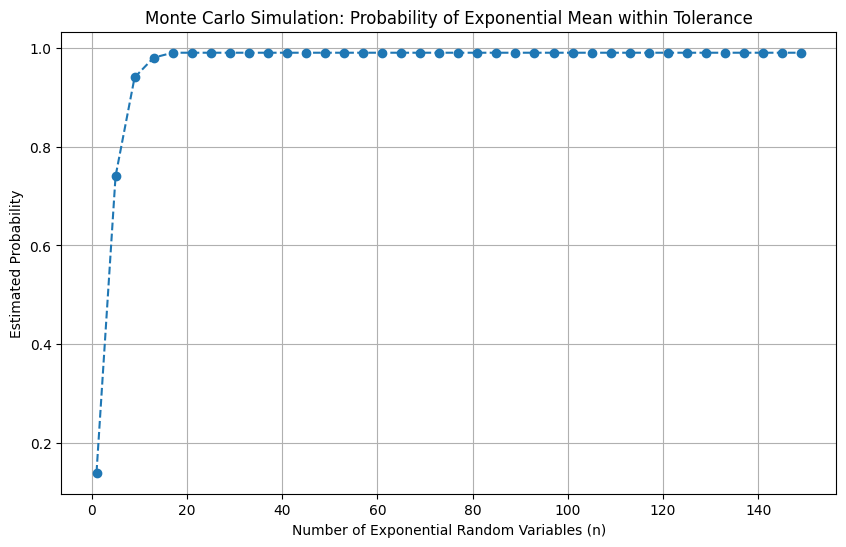

In [45]:
import numpy as np
import matplotlib.pyplot as plt

M = 100  # Number of Monte Carlo samples
#n_vals = list(range(1, 100, 20))
n_vals = [i for i in range(1,150,4)]  # Number of exponential random variables to average
λ = 2  # Rate parameter of the exponential distribution
ϵ = 0.1  # Tolerance around the true mean 1/λ

prob_vals = []

for n in n_vals:
    y =[]
    # Perform Monte Carlo simulation
    for i in range(1, M):
        x = np.random.gamma(n,1/(n*λ),n)
        y_mean = np.mean(x)  # Sample mean of n exponential random variables
        y.append(y_mean)
    prob_vals.append(np.sum(np.abs(np.array(y) - (1 / λ)) < ϵ) / M)


plt.figure(figsize=(10, 6))
plt.plot(n_vals, prob_vals, marker='o', linestyle='--')
plt.xlabel('Number of Exponential Random Variables (n)')
plt.ylabel('Estimated Probability')
plt.title('Monte Carlo Simulation: Probability of Exponential Mean within Tolerance')
plt.grid(True)
plt.show()


(i) Fix 𝑛 and obtain the sampling distribution of 𝑌𝑛 based on 𝑀 = 106 replication. Draw the histogram
and overlay the normal density function with mean 𝜇 and variance $𝜎^2$. What are the values of 𝜇
and $𝜎^2$ (Hint: CLT)

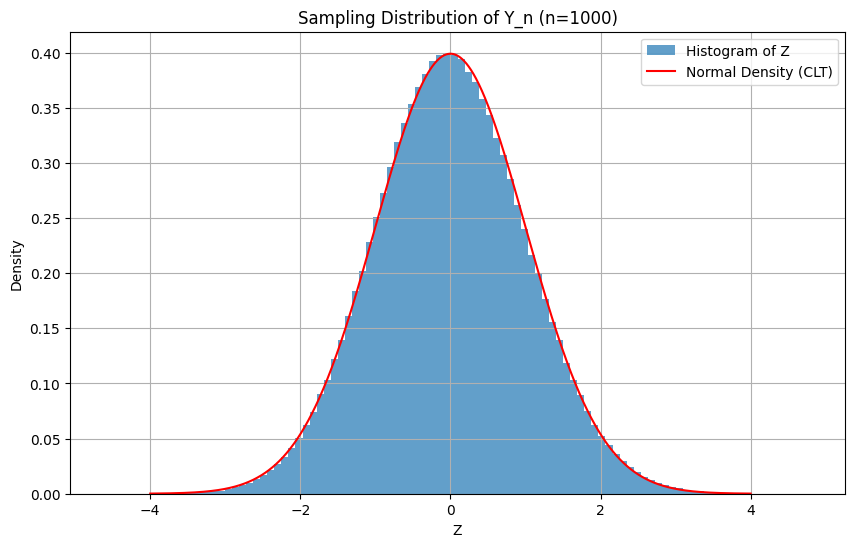

Estimated mean (mu): 0.5
Estimated variance (sigma^2): 0.25


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
M = 10**6
n = 1000  # Number of exponential random variables to average
λ = 2  # Rate parameter of the exponential distribution

# Generate sample means Y_n
Y_n = [np.mean(np.random.exponential(1/λ, n)) for _ in range(M)]

# Compute mean (mu) and variance (sigma^2) x1 x2 ... xn
μ = 1/λ
σ2 = (1/λ)**2
# S2 = (1/(n-1))*
# Standardize Y_n for CLT
Z = (np.array(Y_n) - μ) / np.sqrt(σ2/n)

# Plot histogram of Z
plt.figure(figsize=(10, 6))
plt.hist(Z, bins=100, density=True, alpha=0.7, label='Histogram of Z')

# Overlay normal density function with estimated mu and sigma^2
x_vals = np.linspace(-4, 4, 1000)  # Adjust range based on the expected distribution of Z
plt.plot(x_vals, norm.pdf(x_vals, loc=0, scale=1), 'r-', label='Normal Density (CLT)')

# Set plot labels and title
plt.xlabel('Z')
plt.ylabel('Density')
plt.title(f'Sampling Distribution of Y_n (n={n})')
plt.legend()
plt.grid(True)
plt.show()

# Print estimated mu and sigma^2
print(f"Estimated mean (mu): {μ}")
print(f"Estimated variance (sigma^2): {σ2}")
